In [1]:
%cd '/content/drive/MyDrive/IDS-506/Parkinson Disease Prediction'

/content/drive/MyDrive/IDS-506/Parkinson Disease Prediction


In [2]:
!ls

 Dataset.csv  'Parkinson Disease Prediction.ipynb'   pd_tree_regularized.png
 Dataset.txt   pd_tree_regularized.dot


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Dataset.txt')

In [5]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df[df['status']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),147.0,145.180762,32.348050,88.333000,117.572000,145.174000,170.071000,223.361000
MDVP:Fhi(Hz),147.0,188.441463,88.339180,102.145000,133.776500,163.335000,207.160500,588.518000
MDVP:Flo(Hz),147.0,106.893558,32.274358,65.476000,80.875500,99.770000,129.240000,199.020000
MDVP:Jitter(%),147.0,0.006989,0.005240,0.001680,0.004005,0.005440,0.007670,0.033160
MDVP:Jitter(Abs),147.0,0.000051,0.000037,0.000010,0.000030,0.000040,0.000060,0.000260
MDVP:RAP,147.0,0.003757,0.003241,0.000680,0.002030,0.002840,0.004100,0.021440
MDVP:PPQ,147.0,0.003900,0.002998,0.000920,0.002190,0.003140,0.004360,0.019580
Jitter:DDP,147.0,0.011273,0.009724,0.002040,0.006085,0.008530,0.012300,0.064330
MDVP:Shimmer,147.0,0.033658,0.019970,0.010220,0.018295,0.028380,0.042525,0.119080
MDVP:Shimmer(dB),147.0,0.321204,0.207798,0.090000,0.168000,0.263000,0.394500,1.302000


In [9]:
df[df['status']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080
MDVP:RAP,48.0,0.001925,0.001066,0.000920,0.001332,0.001625,0.001907,0.006240
MDVP:PPQ,48.0,0.002056,0.000943,0.001060,0.001480,0.001775,0.002228,0.005640
Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
MDVP:Shimmer,48.0,0.017615,0.005544,0.009540,0.014475,0.016705,0.020210,0.040870
MDVP:Shimmer(dB),48.0,0.162958,0.057822,0.085000,0.129000,0.154000,0.189250,0.405000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

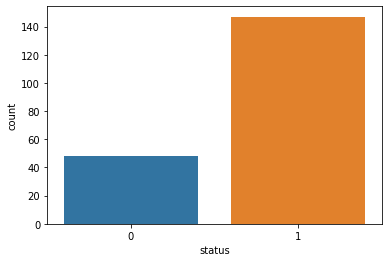

In [11]:
sns.countplot(x='status', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

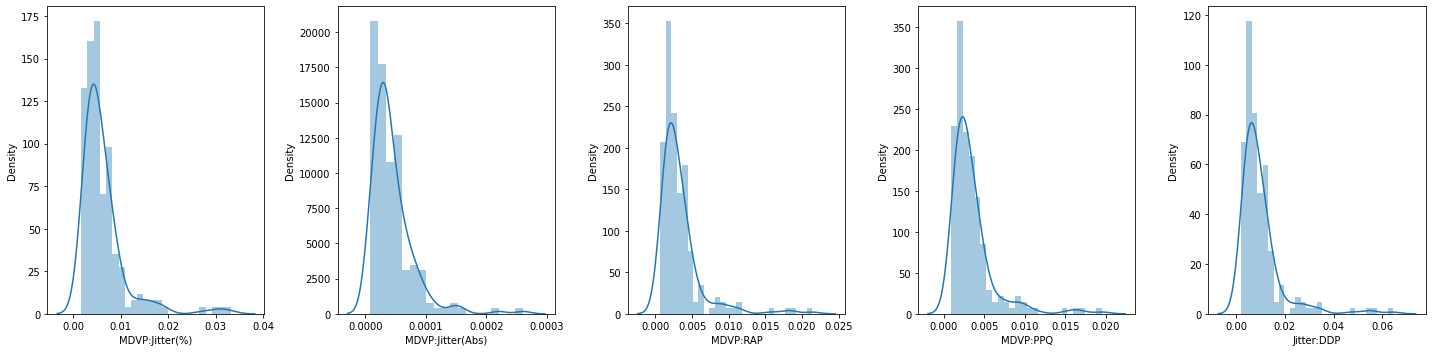

In [12]:
fig, ax = plt.subplots(1,5,figsize=(20,5)) 
sns.distplot(df['MDVP:Jitter(%)'],ax=ax[0]) 
sns.distplot(df['MDVP:Jitter(Abs)'],ax=ax[1]) 
sns.distplot(df['MDVP:RAP'],ax=ax[2]) 
sns.distplot(df['MDVP:PPQ'],ax=ax[3]) 
sns.distplot(df['Jitter:DDP'],ax=ax[4])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

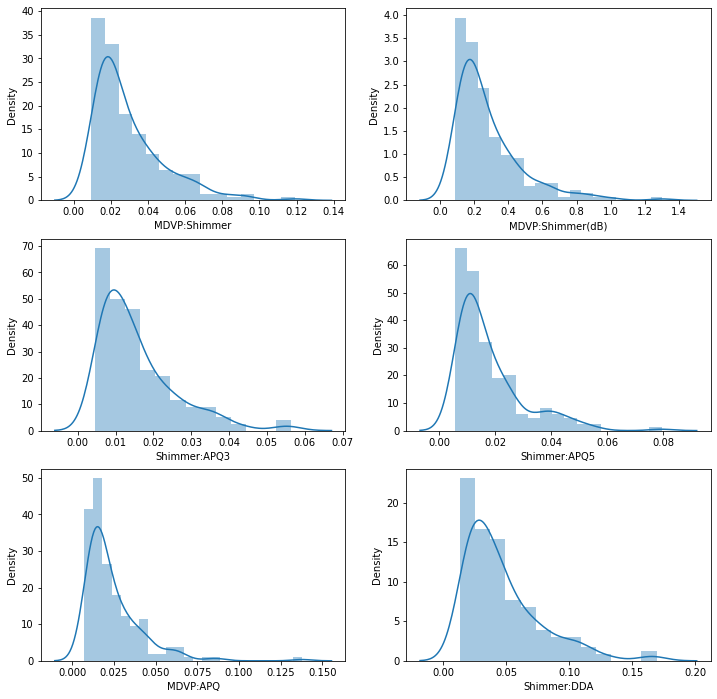

In [13]:
fig, ax = plt.subplots(3,2,figsize=(12,12)) 
sns.distplot(df['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(df['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(df['Shimmer:APQ3'],ax=ax[1,0]) 
sns.distplot(df['Shimmer:APQ5'],ax=ax[1,1]) 
sns.distplot(df['MDVP:APQ'],ax=ax[2,0]) 
sns.distplot(df['Shimmer:DDA'],ax=ax[2,1])

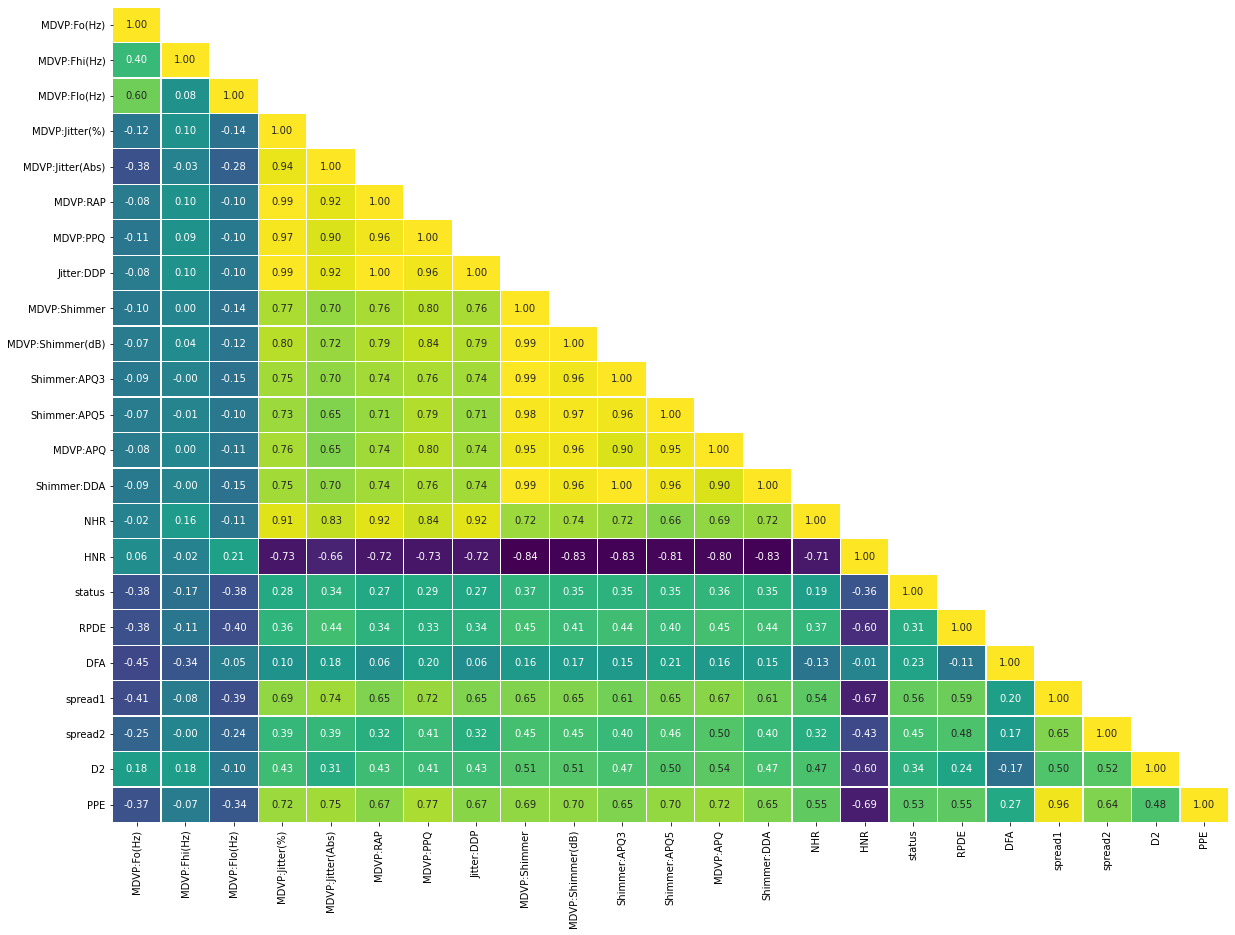

In [14]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask,k=1)] = True
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cbar=False, mask=mask, cmap='viridis', linewidths=0.25)

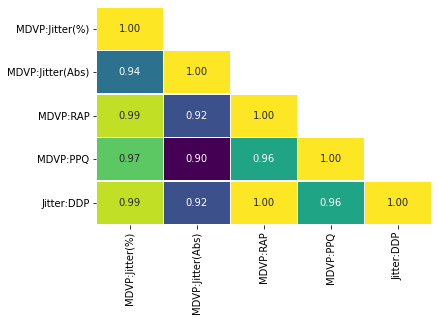

In [15]:
df_1 = df[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']]
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask,k=1)] = True
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df_1.corr(), annot=True, fmt='.2f', cbar=False, mask=mask, cmap='viridis', linewidths=0.25)

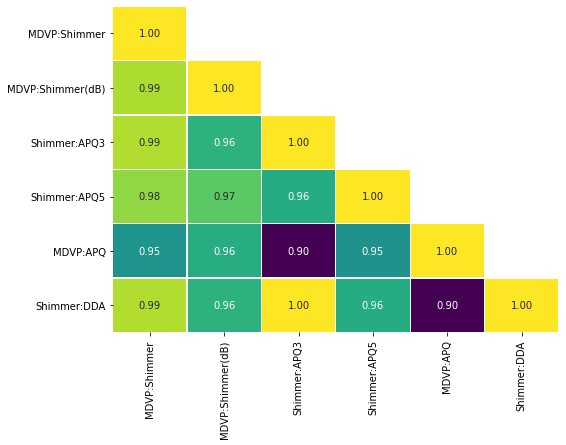

In [16]:
df_1 = df[['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']]
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask,k=1)] = True
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_1.corr(), annot=True, fmt='.2f', cbar=False, mask=mask, cmap='viridis', linewidths=0.25)

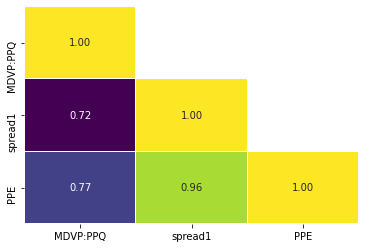

In [17]:
df_1 = df[['MDVP:PPQ','spread1', 'PPE']]
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask,k=1)] = True
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df_1.corr(), annot=True, fmt='.2f', cbar=False, mask=mask, cmap='viridis', linewidths=0.25)

In [18]:
#Creating MDVP_LDA for attributes of measure of variation in fundamental frequency
X = df[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']]
y = df['status']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 4  6]
 [ 1 28]]
Accuracy0.8205128205128205


In [24]:
MDVP_LDA = np.append(X_train,X_test)

In [25]:
df['MDVP_LDA']=pd.DataFrame(MDVP_LDA)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,MDVP_LDA
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,-0.532771
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,-0.059521
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,-0.785138
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.338364
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.234234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,3.552278
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,1.498955
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,-0.548850
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,-0.901451


In [26]:
#Creating Shimmer_LDA for attributes of measure of variation in amplitude
X = df[['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']]
y= df['status']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 7  3]
 [ 5 24]]
Accuracy0.7948717948717948


In [32]:
Shimmer_LDA = np.append(X_train,X_test)

In [33]:
df['Shimmer_LDA']=pd.DataFrame(MDVP_LDA)

In [34]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,MDVP_LDA,Shimmer_LDA
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,-0.532771,-0.532771
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,-0.059521,-0.059521
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,-0.785138,-0.785138
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.338364,0.338364
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.234234,1.234234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,3.552278,3.552278
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,1.498955,1.498955
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,-0.548850,-0.548850
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,-0.901451,-0.901451


In [35]:
#'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'
#'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'
df_2 = df[['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'MDVP_LDA', 'Shimmer_LDA']]

In [36]:
df_2.shape

(195, 15)

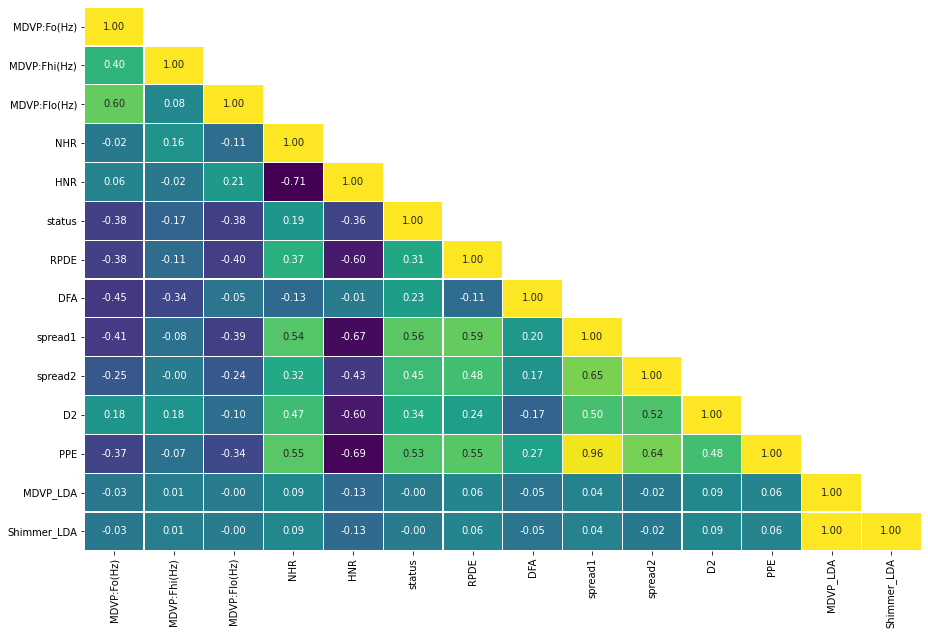

In [37]:
mask = np.zeros_like(df_2.corr())
mask[np.triu_indices_from(mask,k=1)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_2.corr(), annot=True, fmt='.2f', cbar=False, mask=mask, cmap='viridis', linewidths=0.25)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
X_1 = df_2.drop(['status','name','Shimmer_LDA'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_1.columns
vif_data["VIF"] = [variance_inflation_factor(X_1.values, i) 
                          for i in range(len(X_1.columns))] 
  
print(vif_data)

         feature         VIF
0    MDVP:Fo(Hz)   49.805656
1   MDVP:Fhi(Hz)    7.654336
2   MDVP:Flo(Hz)   15.629011
3            NHR    3.088837
4            HNR   75.201698
5           RPDE   40.706631
6            DFA  296.265657
7        spread1  328.896764
8        spread2   18.984797
9             D2   77.997607
10           PPE   80.138403
11      MDVP_LDA    1.050265


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
#Logistic Regression (Baseline Model)
X = df_2[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'MDVP_LDA','Shimmer_LDA']]
y=df_2['status']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [75]:
print(confusion_matrix(y_test,predictions))

[[ 3  4]
 [ 0 32]]


In [76]:
np.exp(log_model.coef_).shape

(1, 13)

In [77]:
Columns = pd.DataFrame(X.columns)
coeffecients = pd.DataFrame(np.exp(log_model.coef_).reshape(13,1))
odds_ratio = pd.concat([Columns,coeffecients],axis=1)
#print(odds_ratio.sort_values(by=odds_ratio[1]))

In [83]:
odds_ratio[1]

,0,0
0,MDVP:Fo(Hz),0.992036
1,MDVP:Fhi(Hz),0.995126
2,MDVP:Flo(Hz),0.998248
3,NHR,1.003644
4,HNR,0.978807
5,RPDE,0.670464
6,DFA,1.131930
7,spread1,4.888483
8,spread2,1.347137
9,D2,5.548352


In [47]:
#Logistic Regression (on Reduced variables based on MKLD and ICPR values)
X = df_2[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'RPDE', 'spread1', 'spread2', 'D2',  'MDVP_LDA','Shimmer_LDA']]
y=df_2['status']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [50]:
print(confusion_matrix(y_test,predictions))

[[ 3  4]
 [ 0 32]]


In [51]:
np.exp(log_model.coef_).shape

(1, 10)

In [52]:
Columns = pd.DataFrame(X.columns)
coeffecients = pd.DataFrame(np.exp(log_model.coef_).reshape(10,1))
odds_ratio = pd.concat([Columns,coeffecients],axis=1)
print(odds_ratio)

              0         0
0   MDVP:Fo(Hz)  0.991919
1  MDVP:Fhi(Hz)  0.995120
2  MDVP:Flo(Hz)  0.998271
3           HNR  0.977413
4          RPDE  0.654947
5       spread1  4.903031
6       spread2  1.317114
7            D2  5.487451
8      MDVP_LDA  0.897023
9   Shimmer_LDA  0.897023


In [53]:
#Decision Tree Classifier
X_train, X_test, y_train,  y_test = train_test_split(X, y, train_size=0.8)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)

In [56]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [57]:
dt_model.score(X_test , y_test)

0.9230769230769231

In [58]:
y_pred = dt_model.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39



In [60]:
confusion_matrix(y_test,y_pred)

array([[ 6,  2],
       [ 1, 30]])

In [61]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 3


In [62]:
from IPython.display import Image
from sklearn import tree
from os import system

In [63]:
train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
MDVP:Fo(Hz)   0.128416
MDVP:Fhi(Hz)  0.088207
MDVP:Flo(Hz)  0.058557
HNR           0.000000
RPDE          0.089779
spread1       0.486715
spread2       0.000000
D2            0.079684
MDVP_LDA      0.068642
Shimmer_LDA   0.000000


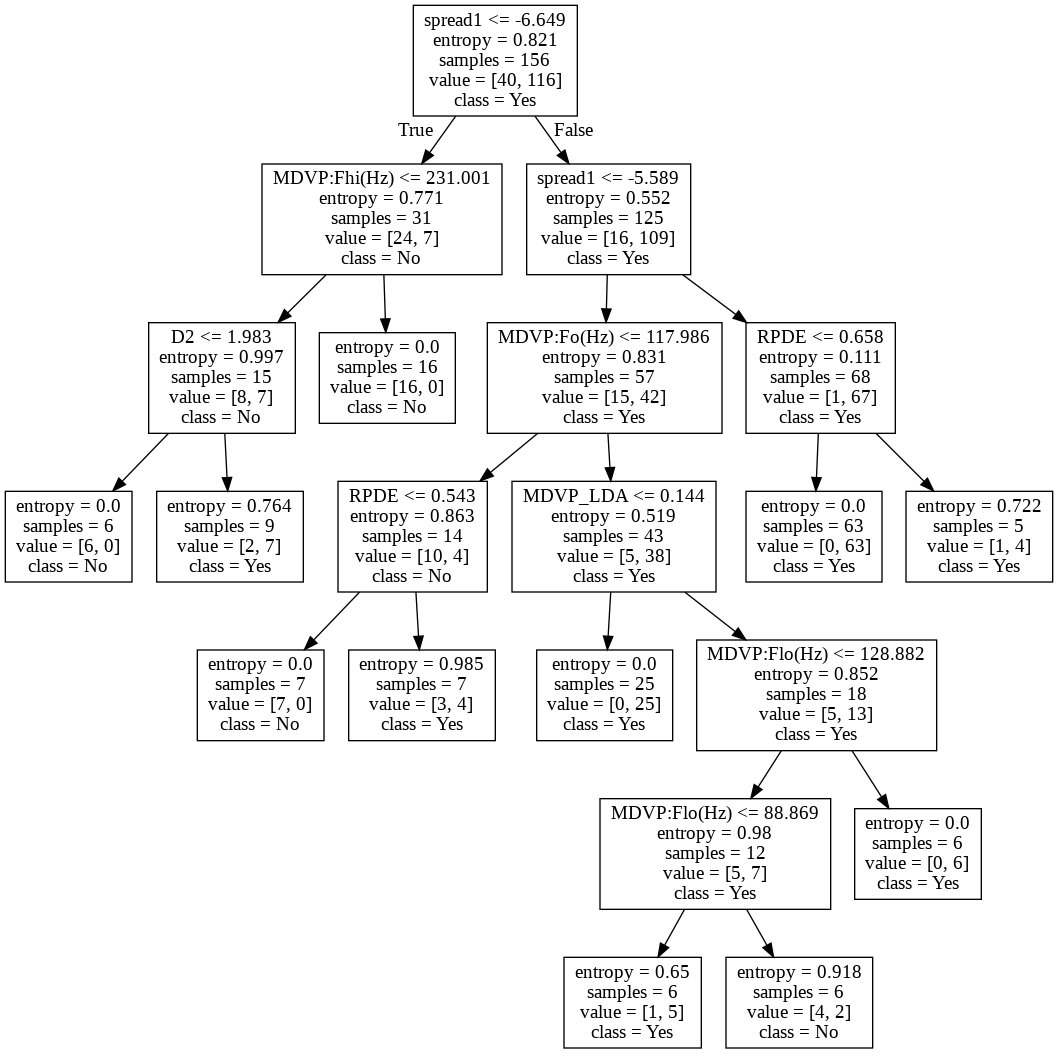

In [64]:
system("dot -Tpng pd_tree_regularized.dot -o pd_tree_regularized.png")
Image("pd_tree_regularized.png")